In [1]:
import sys
sys.path.append('..')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pickle
%matplotlib inline

In [2]:
MORB1 =v.Sample({'SiO2': 50.8,
 'TiO2':     1.84,
 'Al2O3':    13.7,
 'Fe2O3':     2.1,
 'FeO':       10.5,
 'MgO':      6.67,
 'CaO':      11.5,
 'Na2O':      2.68,
 'K2O':       0.15,
'P2O5':     0.19})

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
MORB1_H2O=v.Sample({'SiO2': 50.8,
 'TiO2':     1.84,
 'Al2O3':    13.7,
 'Fe2O3':     2.1,
 'FeO':       10.5,
 'MgO':      6.67,
 'CaO':      11.5,
 'Na2O':      2.68,
 'K2O':       0.15,
'P2O5':     0.19,
'H2O': 15})

## Setting pressure and temperature for isobars

In [4]:
temperature = 1200
pressures = [1000, 4000]

## Calculating MagmaSat Isobars

In [5]:
isobars_MagmaSat, isopleths_MagmaSat = v.calculate_isobars_and_isopleths(sample=MORB1, smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=True).result
smoothed_isobars_MagmaSat = v.vplot.smooth_isobars_and_isopleths(isobars_MagmaSat)


Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 4000 bars
 done.                                                                                                                           
Done!


## Calculating Dixon isobars

In [6]:
smoothed_isobars_Dix, isopleths_Dix = v.calculate_isobars_and_isopleths(sample=MORB1, model='Dixon', smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=False).result


/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/conda/lib/python3.8/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, as well as the upper calibration limit of 2000 bar suggested by Lesne et al. (2011), 
  w.warn(self.calib_check, RuntimeWarning)


## Calculating IaconoMarziano (hydrous) isobars

In [7]:
smoothed_isobars_IM_H, isopleths_IM_H = v.calculate_isobars_and_isopleths(sample=MORB1, model='IaconoMarziano', 
                                          smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=False).result


## Calculating IaconoMarziano (anhydrous) isobars

In [8]:
smoothed_isobars_IM_A, isopleths_IM_A = v.calculate_isobars_and_isopleths(sample=MORB1, model='IaconoMarziano', 
                                           smooth_isobars=False,
                                            coeffs="anhydrous",
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=False).result


In [9]:
smoothed_isobars_Shish, isopleths_Shish = v.calculate_isobars_and_isopleths(sample=MORB1, model='ShishkinaIdealMixing', smooth_isobars=False,
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0, 0.01, 0.25, 0.5, 0.75],
                                            print_status=False).result


# Reading in Papale Isobars

In [11]:
Papale=pd.read_excel(r'../Papale_Inputs_for_each_Figure.xlsx', sheet_name='Figure_Basaltic_Isobars',  index_col=None)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Fitting high(ish) Order Polynomials to Papale data for 400 MPa and 100 MPa

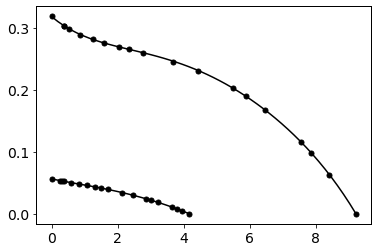

In [12]:
x_400MPa=Papale.loc[Papale['Sample']=="MORB1_4kbar", 'Diss H2O']
y_400MPa=10**(-4)*Papale.loc[Papale['Sample']=="MORB1_4kbar", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_400MPa, y_400MPa, 5))
P_x_400MPa_new = np.linspace(min(x_400MPa), max(x_400MPa), 50)
P_y_400MPa_new = Pf(P_x_400MPa_new)
plt.plot(x_400MPa, y_400MPa, '.k')
plt.plot(P_x_400MPa_new, P_y_400MPa_new, '-k')

x_100MPa=Papale.loc[Papale['Sample']=="MORB1_1kbar", 'Diss H2O']
y_100MPa=10**(-4)*Papale.loc[Papale['Sample']=="MORB1_1kbar", 'Diss CO2']
Pf = np.poly1d(np.polyfit(x_100MPa, y_100MPa, 5))
P_x_100MPa_new = np.linspace(min(x_100MPa), max(x_100MPa), 50)
P_y_100MPa_new = Pf(P_x_100MPa_new)
plt.plot(x_100MPa, y_100MPa, '.k')
plt.plot(P_x_100MPa_new, P_y_100MPa_new, '-k')

# One for final figure

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


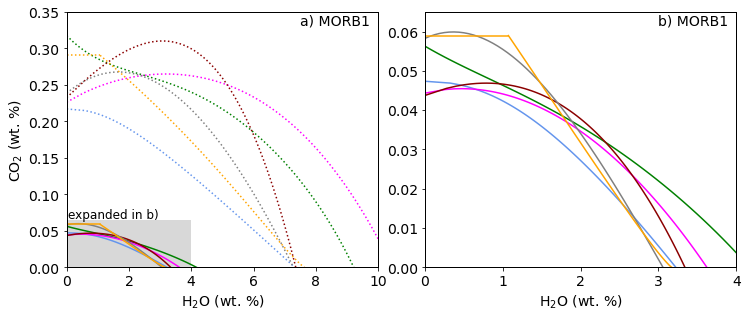

In [13]:
fig, (ax2, ax1) = plt.subplots(1,2, figsize=(12,4.7)) # adjust dimensions of figure here
b=1.5
#-------------------- 1 kbar on its own----------------------
ax1.plot(P_x_100MPa_new, P_y_100MPa_new, color='green', linewidth=b)
ax1.plot(smoothed_isobars_Dix['H2O_liq'].iloc[0:101], smoothed_isobars_Dix['CO2_liq'].iloc[0:101], label='1000 bars Dixon', color='cornflowerblue', linewidth=b)
ax1.plot(smoothed_isobars_IM_H['H2O_liq'].iloc[0:101], smoothed_isobars_IM_H['CO2_liq'].iloc[0:101], label='1000 bars Iacono', color='magenta', linewidth=b)
ax1.plot(smoothed_isobars_IM_A['H2O_liq'].iloc[0:101], smoothed_isobars_IM_A['CO2_liq'].iloc[0:101], label='1000 bars Iacono', color='darkred', linewidth=b)

ax1.plot(smoothed_isobars_MagmaSat['H2O_liq'].iloc[0:50], smoothed_isobars_MagmaSat['CO2_liq'].iloc[0:50], label='1000 bars', color='grey', linestyle='solid', linewidth=b)
ax1.plot(smoothed_isobars_Shish['H2O_liq'].iloc[0:101], smoothed_isobars_Shish['CO2_liq'].iloc[0:101], label='1000 bars Shish', color='orange', linewidth=b)
ax1.plot([0, smoothed_isobars_Shish['H2O_liq'].iloc[0]], 
        [smoothed_isobars_Shish['CO2_liq'].iloc[0], smoothed_isobars_Shish['CO2_liq'].iloc[0]], color='orange', linewidth=b)


#-------------------- 4 kbar and 1 kbar together----------------------
ax2.plot(P_x_400MPa_new, P_y_400MPa_new, color='green', linewidth=b,  linestyle='dotted')
ax2.plot(smoothed_isobars_Dix['H2O_liq'].iloc[101:], smoothed_isobars_Dix['CO2_liq'].iloc[101:], label='1000 bars Dixon', color='cornflowerblue', linewidth=b, linestyle='dotted')
ax2.plot(smoothed_isobars_IM_H['H2O_liq'].iloc[101:], smoothed_isobars_IM_H['CO2_liq'].iloc[101:], label='1000 bars Iacono', color='magenta', linewidth=b, linestyle='dotted')
ax2.plot(smoothed_isobars_IM_A['H2O_liq'].iloc[101:], smoothed_isobars_IM_A['CO2_liq'].iloc[101:], label='1000 bars Iacono', color='darkred', linewidth=b, linestyle='dotted')

ax2.plot(smoothed_isobars_MagmaSat['H2O_liq'].iloc[50:100], smoothed_isobars_MagmaSat['CO2_liq'].iloc[50:100], label='1000 bars', color='grey',  linewidth=b, linestyle='dotted')
ax2.plot(smoothed_isobars_Shish['H2O_liq'].iloc[101:], smoothed_isobars_Shish['CO2_liq'].iloc[101:], label='1000 bars Shish', color='orange', linewidth=b, linestyle='dotted')
ax2.plot([0, smoothed_isobars_Shish['H2O_liq'].iloc[101]], 
        [smoothed_isobars_Shish['CO2_liq'].iloc[101], smoothed_isobars_Shish['CO2_liq'].iloc[101]], color='orange', linewidth=b, linestyle='dotted')


ax2.plot(P_x_100MPa_new, P_y_100MPa_new, color='green', linewidth=b)
ax2.plot(smoothed_isobars_Dix['H2O_liq'].iloc[0:101], smoothed_isobars_Dix['CO2_liq'].iloc[0:101], label='1000 bars Dixon', color='cornflowerblue', linewidth=b)
ax2.plot(smoothed_isobars_IM_H['H2O_liq'].iloc[0:101], smoothed_isobars_IM_H['CO2_liq'].iloc[0:101], label='1000 bars Iacono', color='magenta', linewidth=b)
ax2.plot(smoothed_isobars_IM_A['H2O_liq'].iloc[0:101], smoothed_isobars_IM_A['CO2_liq'].iloc[0:101], label='1000 bars Iacono', color='darkred', linewidth=b)

ax2.plot(smoothed_isobars_MagmaSat['H2O_liq'].iloc[0:50], smoothed_isobars_MagmaSat['CO2_liq'].iloc[0:50], label='1000 bars', color='grey',  linewidth=b)
ax2.plot(smoothed_isobars_Shish['H2O_liq'].iloc[0:101], smoothed_isobars_Shish['CO2_liq'].iloc[0:101], label='1000 bars Shish', color='orange', linewidth=b)
ax2.plot([0, smoothed_isobars_Shish['H2O_liq'].iloc[0]], 
        [smoothed_isobars_Shish['CO2_liq'].iloc[0], smoothed_isobars_Shish['CO2_liq'].iloc[0]], color='orange', linewidth=b)

#---------------------- Formatting stuff------------------
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.15, hspace=None)
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 0.35])
ax2.annotate("a) MORB1", xy=(0.75, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("b) MORB1", xy=(0.75, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("expanded in b)", xy=(0.03, 0.068), xycoords="data", fontsize=12)
ax1.set_xlabel('H$_{2}$O (wt. %)', fontsize=14)
#ax1.set_ylabel('CO$_{2}$ (wt. %)', fontsize=14)
ax2.set_xlabel('H$_{2}$O (wt. %)', fontsize=14)
ax2.set_ylabel('CO$_{2}$ (wt. %)', fontsize=14)

ax1.set_xlim([0, 4])
ax1.set_ylim([0, 0.065])
#### 400 MPA
import matplotlib.patches as patches
rect = patches.Rectangle((0,0),4,0.065,linewidth=1,edgecolor='none',facecolor='grey', alpha=0.3)
 # Add the patch to the Axes
ax2.add_patch(rect)

fig.savefig('Fig6a_MORB1_IsobarComparison.svg', transparent=True)